In [ ]:
from csv import DictReader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import math
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import os

old_store = pd.read_csv('./Data/Google-Playstore_filtered.csv')
store = pd.read_csv('./Data/New-data.csv')

In [2]:
category_counts = store['Category'].value_counts()
category_Rating = (
    store[(store['Rating'].notna()) & (store['Rating'] != 0.0) & (store['Rating'] != 5.0)]
    .groupby('Category')['Rating']
    .apply(list)
    .to_dict()
)
rating_price = store[(store['Rating'].notna()) & (store['Rating'] != 0.0) & (store['Rating'] != 5.0)].groupby('Free')['Rating'].apply(list)

In [3]:
category_counts = store['Category'].value_counts()

store['Installs'] = pd.to_numeric(store['Installs'], errors='coerce')

category_avg_installs = (
    store[store['Installs'].notna()]
    .groupby('Category')['Installs']
    .mean()
    .round(0)
    .astype(int)
    .to_dict()
)
category_avg_installs_list = list(category_avg_installs.items())

category_avg_rating = (
    store[store['Rating'].notna()]
    .groupby('Category')['Rating']
    .mean()
    .round(2)
    .to_dict()
)
category_avg_rating_list = list(category_avg_rating.items())
category_avg_rating_list_sorted = sorted(category_avg_rating_list, key=lambda x: x[1])
category_counts_sorted = category_counts.sort_values(ascending=False)
category_avg_installs_list_sorted = sorted(category_avg_installs_list, key=lambda x: x[1])


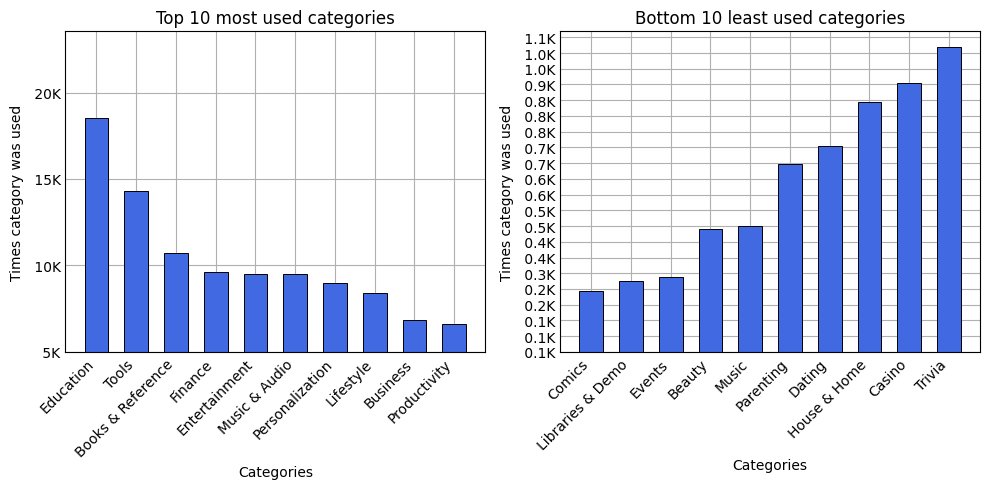

In [4]:
plt.style.use('_mpl-gallery')

# Data for the first graph (Top 10 most popular categories)
labels1 = category_counts_sorted.index[:10]
values1 = category_counts_sorted.values[:10]

# Data for the second graph (Top 10 least popular categories)
labels2 = category_counts_sorted.index[-10:][::-1]
values2 = category_counts_sorted.values[-10:][::-1]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
def thousand_formatter1(x, pos):
    return f'{x * 1e-3: .0f}K'
def thousand_formatter2(x, pos):
    return f'{x * 1e-3: .1f}K'

# First graph
tic_rate = 5000
x1 = np.arange(len(labels1))
axes[0].bar(x1, values1, width=0.6, edgecolor="black", linewidth=0.7, color="royalblue")
axes[0].set_xticks(x1)
axes[0].set_xticklabels(labels1, rotation=45, ha="right")
axes[0].set_ylim(tic_rate, max(values1) + tic_rate)
axes[0].set_yticks(np.arange(tic_rate, max(values1) + tic_rate, tic_rate))
axes[0].yaxis.set_major_formatter(FuncFormatter(thousand_formatter1))
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Times category was used")
axes[0].set_title("Top 10 most used categories")

# Second graph
tic_rate = 50
x2 = np.arange(len(labels2))
axes[1].bar(x2, values2, width=0.6, edgecolor="black", linewidth=0.7, color="royalblue")
axes[1].set_xticks(x2)
axes[1].set_xticklabels(labels2, rotation=45, ha="right")
axes[1].set_ylim(tic_rate, max(values2) + tic_rate)
axes[1].set_yticks(np.arange(tic_rate, max(values2) + tic_rate, tic_rate))
axes[1].yaxis.set_major_formatter(FuncFormatter(thousand_formatter2))
axes[1].set_xlabel("Categories")
axes[1].set_ylabel("Times category was used")
axes[1].set_title("Bottom 10 least used categories")

plt.tight_layout()
plt.show()

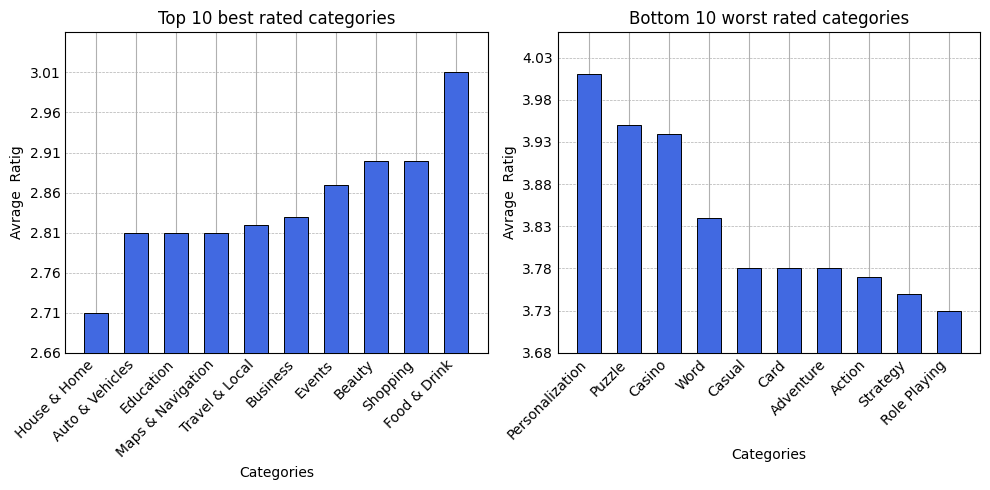

In [5]:

# Data for the first graph (Top 10 best rated categories)
labels1, values1 = zip(*category_avg_rating_list_sorted[:10])

# Data for the second graph (Top 10 worst rated categories)
labels2, values2 = zip(*category_avg_rating_list_sorted[-10:][::-1])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First graph
tic_rate = 0.05
min_value = min(values1) - tic_rate
x1 = np.arange(len(labels1))
axes[0].bar(x1, values1, width=0.6, edgecolor="black", linewidth=0.7, color="royalblue", zorder=3)
axes[0].set_xticks(x1)
axes[0].set_xticklabels(labels1, rotation=45, ha="right")
axes[0].set_ylim(min_value, max(values1) + tic_rate)
axes[0].set_yticks(np.arange(min_value, max(values1) + tic_rate, tic_rate))
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Avrage  Ratig")
axes[0].set_title("Top 10 best rated categories")
axes[0].grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)

# Second graph
tic_rate = 0.05
min_value = min(values2) - tic_rate
x2 = np.arange(len(labels2))
axes[1].bar(x2, values2, width=0.6, edgecolor="black", linewidth=0.7, color="royalblue", zorder=3)
axes[1].set_xticks(x2)
axes[1].set_xticklabels(labels2, rotation=45, ha="right")
axes[1].set_ylim(min_value, max(values2) + tic_rate)
axes[1].set_yticks(np.arange(min_value, max(values2) + tic_rate, tic_rate))
axes[1].set_xlabel("Categories")
axes[1].set_ylabel("Avrage  Ratig")
axes[1].set_title("Bottom 10 worst rated categories")
axes[1].grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()

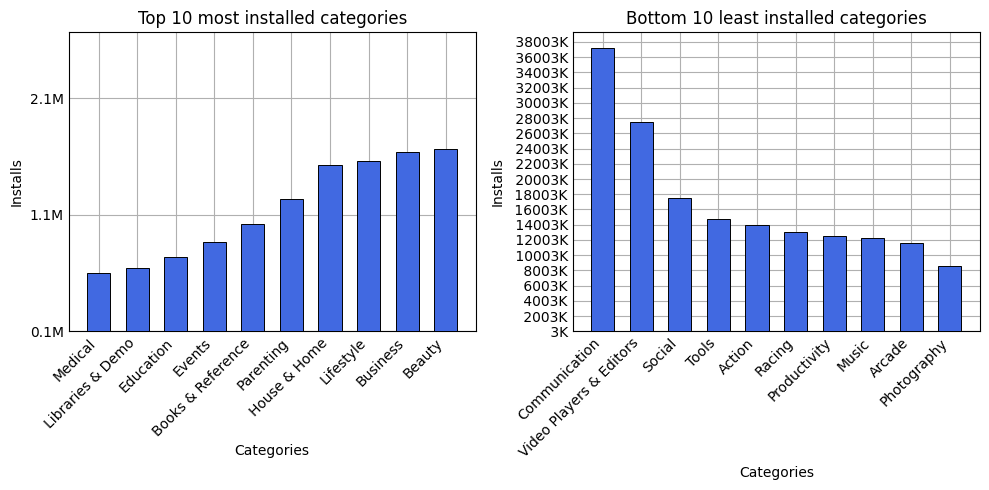

In [6]:
# Data for the first graph (Top 10 best rated categories)
labels1, values1 = zip(*category_avg_installs_list_sorted[:10])

# Data for the second graph (Top 10 worst rated categories)
labels2, values2 = zip(*category_avg_installs_list_sorted[-10:][::-1])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'
def thousand_formatter(x, pos):
    return f'{x * 1e-3: .0f}K'

# First graph
tic_rate = 1000000
min_value = round(min(values1)) - tic_rate /2
x1 = np.arange(len(labels1))
axes[0].bar(x1, values1, width=0.6, edgecolor="black", linewidth=0.7, color="royalblue", zorder=3)
axes[0].set_xticks(x1)
axes[0].set_xticklabels(labels1, rotation=45, ha="right")
axes[0].set_ylim(min_value, max(values1) + tic_rate)
axes[0].set_yticks(np.arange(min_value, max(values1) + tic_rate, tic_rate))
axes[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
axes[0].set_xlabel("Categories")
axes[0].set_ylabel("Installs")
axes[0].set_title("Top 10 most installed categories")
# axes[0].grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)

# Second graph
tic_rate = 2000000
min_value = 3000
x2 = np.arange(len(labels2))
axes[1].bar(x2, values2, width=0.6, edgecolor="black", linewidth=0.7, color="royalblue", zorder=3)
axes[1].set_xticks(x2)
axes[1].set_xticklabels(labels2, rotation=45, ha="right")
axes[1].set_ylim(min_value, max(values2) + tic_rate)
axes[1].set_yticks(np.arange(min_value, max(values2) + tic_rate, tic_rate))
axes[1].yaxis.set_major_formatter(FuncFormatter(thousand_formatter))
axes[1].set_xlabel("Categories")
axes[1].set_ylabel("Installs")
axes[1].set_title("Bottom 10 least installed categories")
# axes[1].grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)

plt.tight_layout()
plt.show()

In [7]:
filtered = store[(store['Rating'].notna()) & (store['Rating'] != 0.0)]

#Remove botted apps(Allegedly)
filtered = filtered[filtered['Rating'] < 5.0]

is_paid = ~filtered['Free']
has_ads = filtered['Ad Supported'] == True
has_iap = filtered['In App Purchases'] == True
fully_free = filtered['Free'] & ~has_ads & ~has_iap
with_ads = filtered['Free'] & has_ads & ~has_iap
with_iap = filtered['Free'] & ~has_ads & has_iap
with_both = filtered['Free'] & has_ads & has_iap

rating_price = {
    'Fully Free': filtered[fully_free]['Rating'].tolist(),
    'With Ads': filtered[with_ads]['Rating'].tolist(),
    'Paid': filtered[is_paid]['Rating'].tolist(),
    'With IAP': filtered[with_iap]['Rating'].tolist(),
    'With Ads + IAP': filtered[with_both]['Rating'].tolist()   
}

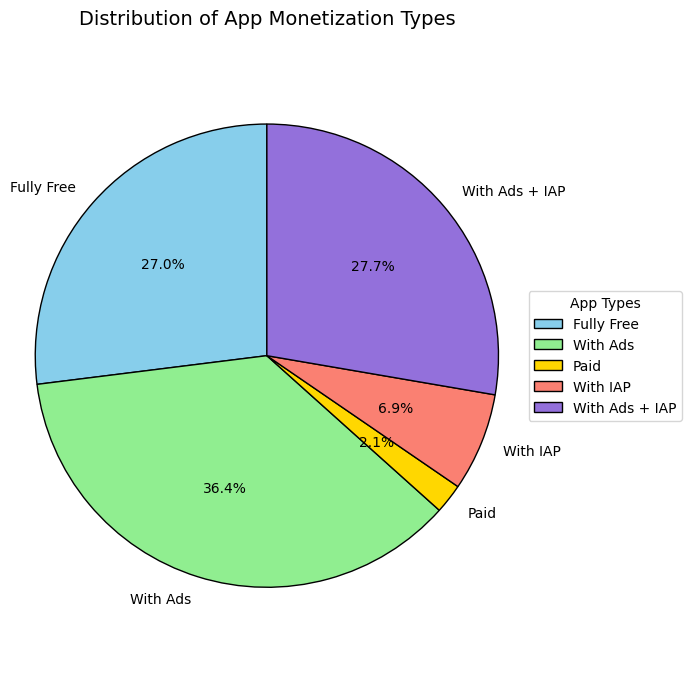

In [ ]:
labels = list(rating_price.keys())
values = [len(rating_price[key]) for key in labels]
colors = ['skyblue', 'lightgreen', 'gold', 'salmon', 'mediumpurple']

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.legend(wedges, labels, title="App Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of App Monetization Types", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


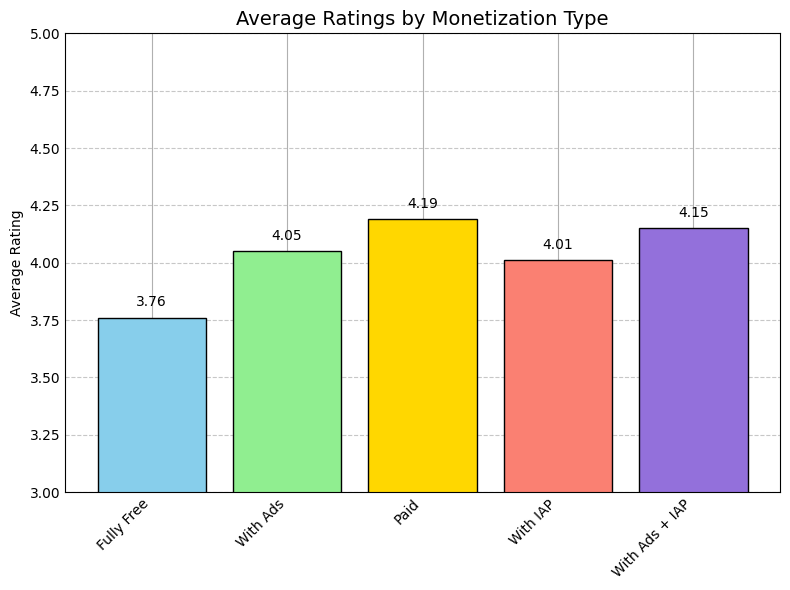

In [9]:
labels = list(rating_price.keys())
avg_ratings = [round(sum(ratings) / len(ratings), 2) if ratings else 0 for ratings in rating_price.values()]
colors = ['skyblue', 'lightgreen', 'gold', 'salmon', 'mediumpurple']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, avg_ratings, color=colors, edgecolor='black')

for bar, rating in zip(bars, avg_ratings):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{rating:.2f}', ha='center', fontsize=10)

plt.title("Average Ratings by Monetization Type", fontsize=14)
plt.ylabel("Average Rating")
plt.ylim(3, 5)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Bias in Catagories and Pricing Groups


In [12]:
category_MaxInstall_all_id = (
    store[store['Installs'].notna()]
    .sort_values(['Category', 'Installs'], ascending=[True, False])
    .groupby('Category')
    .agg({
        'App Name': list,
        'App Id': list,
        'Installs': list
    })
    .apply(lambda row: list(zip(row['App Name'], row['App Id'], row['Installs'])), axis=1)
    .to_dict()
)

### installs catagories with Control_Group

In [ ]:
bias_multiplier = 2.5
min_apps_required = 5 

ratios_installs_catagories = []
top_avg_all_avg_catagories = {}

for category, avg_install in category_avg_installs_list_sorted:
    apps = category_MaxInstall_all_id.get(category, [])
    if len(apps) < min_apps_required:
        continue

    sorted_apps = sorted(apps, key=lambda x: x[2], reverse=True)
    installs = [app[2] for app in sorted_apps]
    ids = [app[1] for app in sorted_apps]

    avg_all_installs = sum(installs) / len(installs)

    standout_apps = [app for app in sorted_apps if app[2] > bias_multiplier * avg_all_installs]
    if not standout_apps:
        continue

    standout_ids = [app[1] for app in standout_apps]
    standout_installs = [app[2] for app in standout_apps]
    standout_ratings = store.loc[store['App Id'].isin(standout_ids), 'Rating'].dropna().tolist()

    avg_top_rating = round(sum(standout_ratings) / len(standout_ratings), 2) if standout_ratings else "n/a"
    avg_top_installs = round(sum(standout_installs) / len(standout_installs))
    total_top_installs = sum(standout_installs)

    remaining_apps = [app for app in sorted_apps if app[1] not in standout_ids]
    if not remaining_apps:
        continue

    remaining_ids = [app[1] for app in remaining_apps]
    remaining_installs = [app[2] for app in remaining_apps]
    remaining_ratings = store.loc[store['App Id'].isin(remaining_ids), 'Rating'].dropna()

    avg_remaining_rating = round(remaining_ratings.mean(), 2) if not remaining_ratings.empty else "n/a"
    avg_remaining_installs = round(sum(remaining_installs) / len(remaining_installs))
    total_remaining_installs = sum(remaining_installs)

    Remaining_ratio = round(len(remaining_apps) / (len(standout_apps) + len(remaining_apps)) * 100, 1)

    bias_ratio = avg_top_installs / avg_remaining_installs if avg_remaining_installs > 0 else 0
    
    top_avg_all_avg_catagories[category] = [bias_ratio, Remaining_ratio, len(standout_apps), len(remaining_apps),
                                       avg_top_rating, avg_remaining_rating, total_top_installs, total_remaining_installs]

    ratios_installs_catagories.append((category, bias_ratio))

ratios_installs_catagories = sorted(ratios_installs_catagories, key=lambda x: x[1], reverse=True)

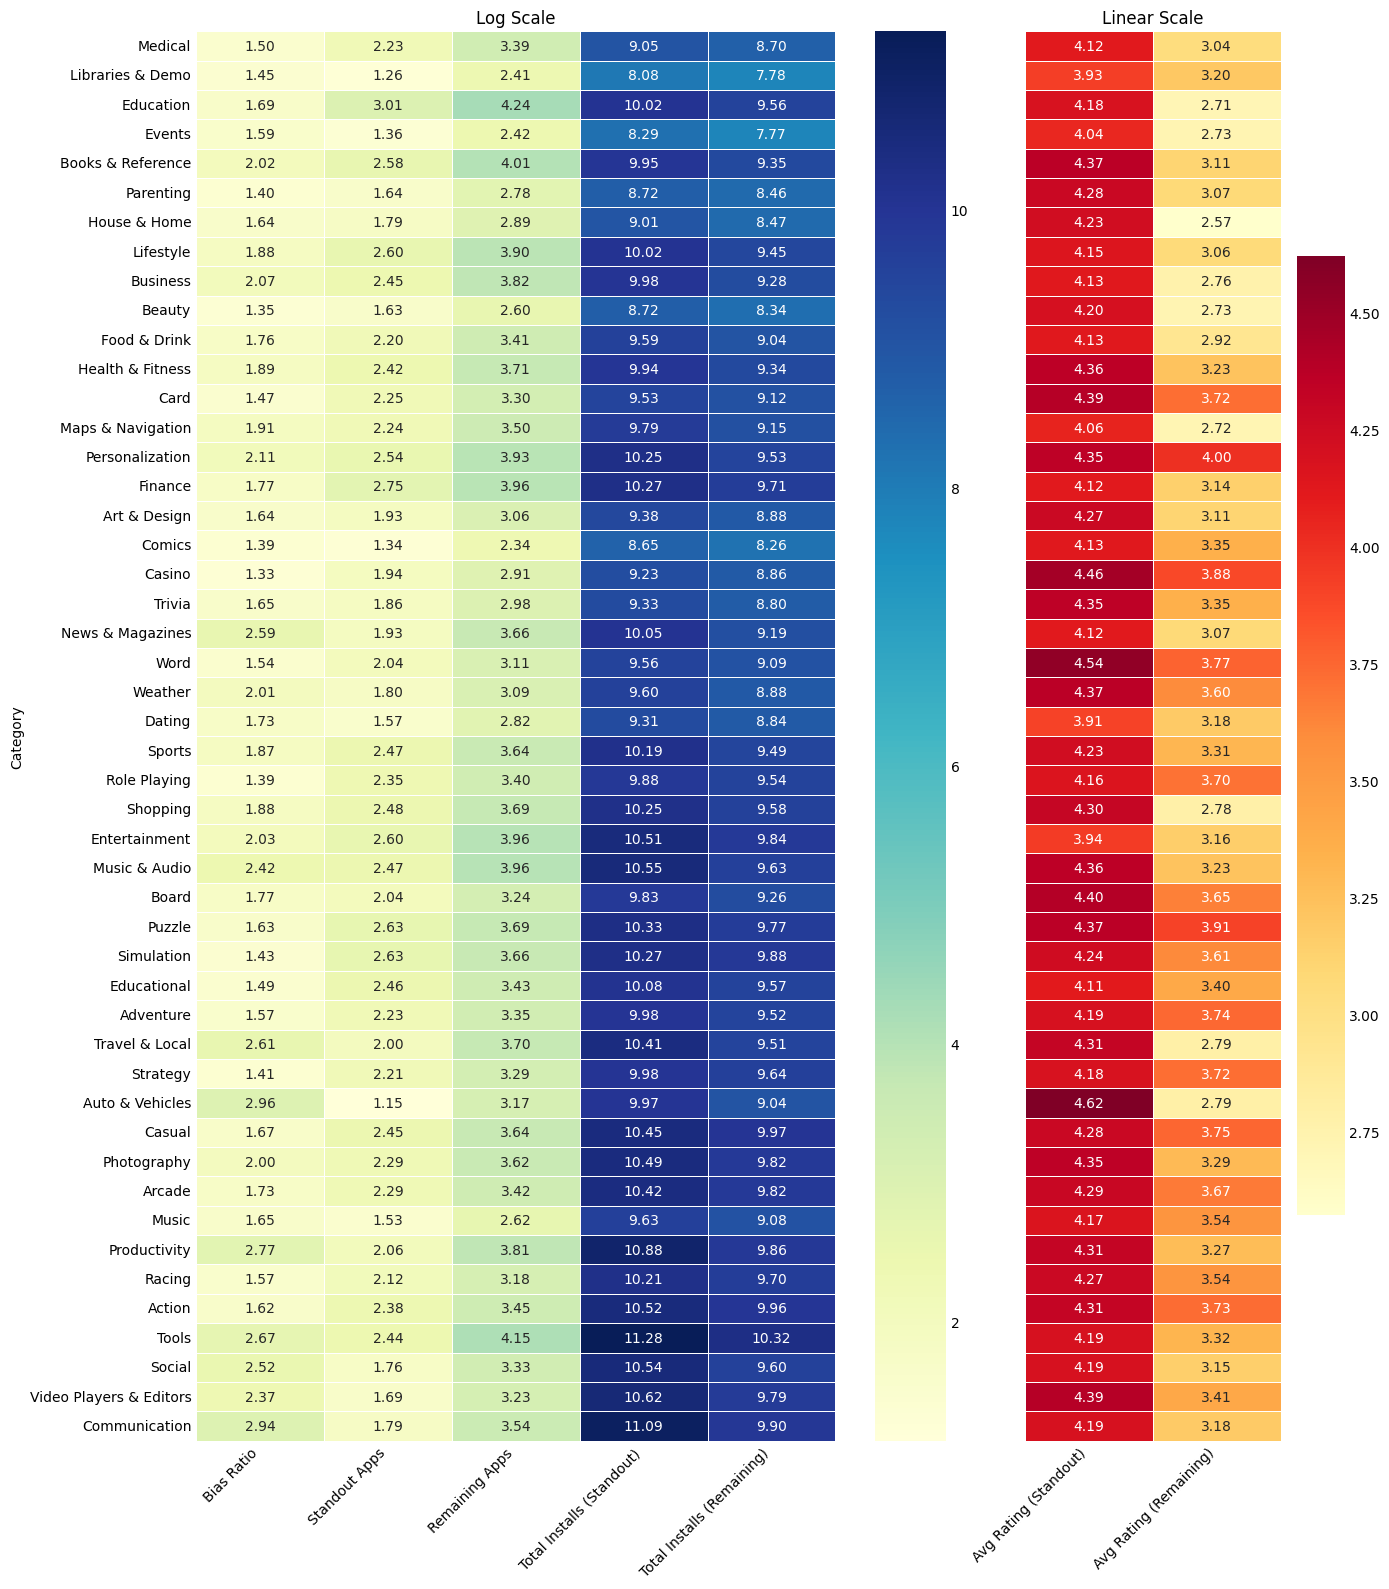

In [ ]:
columns = [
    "Bias Ratio", "Avg Ratio (%)", "Standout Apps", "Remaining Apps",
    "Avg Rating (Standout)", "Avg Rating (Remaining)",
    "Total Installs (Standout)", "Total Installs (Remaining)"
]

df = pd.DataFrame.from_dict(
    top_avg_all_avg_catagories, orient='index', columns=columns
)

df_numeric = df.select_dtypes(include=['number'])

df_numeric = df_numeric.drop(columns=["Avg Ratio (%)"])

log_columns = [
    "Bias Ratio", "Standout Apps", "Remaining Apps",
    "Total Installs (Standout)", "Total Installs (Remaining)"
]
linear_columns = ["Avg Rating (Standout)", "Avg Rating (Remaining)"]

df_log = df_numeric[log_columns]
df_log = np.log10(df_log + 1e-3)

df_linear = df_numeric[linear_columns]

fig, axes = plt.subplots(1, 2, figsize=(14, 16), gridspec_kw={'width_ratios': [len(log_columns), len(linear_columns)]})

sns.heatmap(df_log, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, ax=axes[0], cbar=True)
axes[0].set_title("Log Scale")
axes[0].set_ylabel("Category")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.heatmap(df_linear, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5, ax=axes[1], cbar=True)
axes[1].set_title("Linear Scale")
axes[1].set_ylabel("")
axes[1].set_yticklabels([]) 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Pricing groups with Avrage and bias

In [16]:
pricing_groups = {
    'Fully Free': filtered[fully_free],
    'With Ads': filtered[with_ads],
    'Paid': filtered[is_paid],
    'With IAP': filtered[with_iap],
    'With Ads + IAP': filtered[with_both]
}

In [ ]:
bias_multiplier = 2.5 
min_apps_required = 5  

ratios_installs_pricing = []
top_avg_all_avg_pricing = {}

for pricing_method, df in pricing_groups.items():
    if len(df) < min_apps_required:
        continue

    df_sorted = df.sort_values('Installs', ascending=False)
    avg_all_installs = df_sorted['Installs'].mean()

    standout_apps = df_sorted[df_sorted['Installs'] > bias_multiplier * avg_all_installs]
    if standout_apps.empty:
        continue

    remaining_apps = df_sorted[~df_sorted['App Id'].isin(standout_apps['App Id'])]
    if remaining_apps.empty:
        continue

    standout_ratings = standout_apps['Rating'].dropna()
    remaining_ratings = remaining_apps['Rating'].dropna()
    avg_top_rating = round(standout_ratings.mean(), 2) if not standout_ratings.empty else "n/a"
    avg_remaining_rating = round(remaining_ratings.mean(), 2) if not remaining_ratings.empty else "n/a"

    standout_installs = standout_apps['Installs']
    remaining_installs = remaining_apps['Installs']
    avg_top_installs = round(standout_installs.mean())
    avg_remaining_installs = round(remaining_installs.mean())
    total_top_installs = standout_installs.sum()
    total_remaining_installs = remaining_installs.sum()

    total_apps = len(standout_apps) + len(remaining_apps)
    Remaining_ratio = round(len(remaining_apps) / total_apps * 100, 1)

    bias_ratio = avg_top_installs / avg_remaining_installs if avg_remaining_installs > 0 else 0

    top_avg_all_avg_pricing[pricing_method] = [bias_ratio, Remaining_ratio, len(standout_apps), len(remaining_apps),
                                       avg_top_rating, avg_remaining_rating, total_top_installs, total_remaining_installs]
    
    
    ratios_installs_pricing.append((pricing_method, bias_ratio))

ratios_installs_pricing = sorted(ratios_installs_pricing, key=lambda x: x[1], reverse=True)

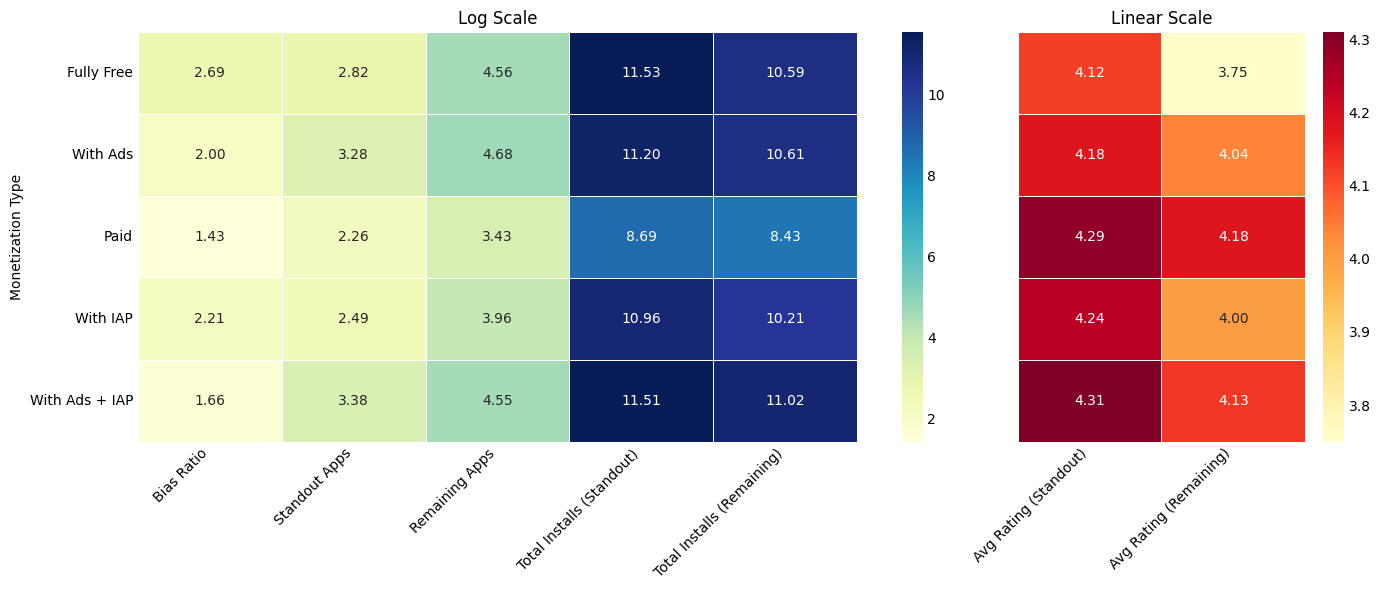

In [ ]:


columns = [
    "Bias Ratio", "Avg Ratio (%)", "Standout Apps", "Remaining Apps",
    "Avg Rating (Standout)", "Avg Rating (Remaining)",
    "Total Installs (Standout)", "Total Installs (Remaining)"
]
df = pd.DataFrame.from_dict(
    top_avg_all_avg_pricing, orient='index', columns=columns
)

df_numeric = df.select_dtypes(include=['number'])

df_numeric = df_numeric.drop(columns=["Avg Ratio (%)"])

log_columns = [
    "Bias Ratio", "Standout Apps", "Remaining Apps",
    "Total Installs (Standout)", "Total Installs (Remaining)"
]
linear_columns = ["Avg Rating (Standout)", "Avg Rating (Remaining)"]

df_log = df_numeric[log_columns]
df_log = np.log10(df_log + 1e-3)

df_linear = df_numeric[linear_columns]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [len(log_columns), len(linear_columns)]})

sns.heatmap(df_log, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, ax=axes[0], cbar=True)
axes[0].set_title("Log Scale")
axes[0].set_ylabel("Monetization Type")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.heatmap(df_linear, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5, ax=axes[1], cbar=True)
axes[1].set_title("Linear Scale")
axes[1].set_ylabel("") 
axes[1].set_yticklabels([])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Learning model

In [ ]:
df = store.dropna(subset=['Rating', 'Category', 'Free', 'Ad Supported', 'In App Purchases', 'Rating Count'])
X = df[['Category', 'Free', 'Ad Supported', 'In App Purchases', 'Rating Count']]
X = pd.get_dummies(X, columns=['Category'])
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Test score:", model.score(X_test, y_test))

Test score: 0.8382384166078131


### See what model is best

In [21]:
def train_and_evaluate_models(X, y, n_repeats=5, test_size=0.2):
    models = {
        'LinearRegression': LinearRegression(),
        'Ridge': Ridge(alpha=1.0),
        'Lasso': Lasso(alpha=0.1),
        'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
    }
    results = {name: {'MSEs': [], 'R2': [], 'MAE': []} for name in models}
    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=None)
        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            results[name]['MSEs'].append(mean_squared_error(y_test, y_pred))
            results[name]['R2'].append(r2_score(y_test, y_pred))
            results[name]['MAE'].append(mean_absolute_error(y_test, y_pred))
    for name in models:
        avg_mse = np.mean(results[name]['MSEs'])
        avg_r2 = np.mean(results[name]['R2'])
        avg_mae = np.mean(results[name]['MAE'])
        print(f"{name}: Avg MSE={avg_mse:.4f}, Avg RMSE={np.sqrt(avg_mse):.4f}, Avg MAE={avg_mae:.4f}, Avg R²={avg_r2:.4f}")
    return results

# Example usage:
required_columns = ['Rating', 'Category', 'Free', 'Ad Supported', 'In App Purchases', 'Rating Count']
df = store.dropna(subset=required_columns)
X = df[['Category', 'Free', 'Ad Supported', 'In App Purchases', 'Rating Count']]
X = pd.get_dummies(X, columns=['Category'], drop_first=True)
y = df['Rating']

results = train_and_evaluate_models(X, y, n_repeats=5)

LinearRegression: Avg MSE=2.5602, Avg RMSE=1.6001, Avg MAE=1.2515, Avg R²=0.0784
Ridge: Avg MSE=2.5602, Avg RMSE=1.6001, Avg MAE=1.2515, Avg R²=0.0784
Lasso: Avg MSE=2.7053, Avg RMSE=1.6448, Avg MAE=1.3032, Avg R²=0.0262
RandomForest: Avg MSE=0.4546, Avg RMSE=0.6743, Avg MAE=0.4535, Avg R²=0.8364


### RandomForestRegressor - Toggle Installs & Rating 

In [22]:
target_variable = 'Installs'
# target_variable = 'Rating'

required_columns = ['Category', 'Free', 'Ad Supported', 'In App Purchases', 'Rating Count', target_variable]
df = store.dropna(subset=required_columns)

X = df[['Category', 'Free', 'Ad Supported', 'In App Purchases', 'Rating Count']]
X = pd.get_dummies(X, columns=['Category'], drop_first=True)

y = df[target_variable]

In [23]:
model_path = f'final_random_forest_model_{target_variable.lower()}.pkl'
if os.path.exists(model_path):
    final_model = joblib.load(model_path)
    print(f"Loaded existing RandomForest model for '{target_variable}' from disk.")
else:
    final_model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
    final_model.fit(X, y)
    joblib.dump(final_model, model_path)
    print(f"Trained and saved new RandomForest model for '{target_variable}'.")

Loaded existing RandomForest model for 'Installs' from disk.


In [24]:
def predict_value(model, input_dict, feature_columns):
    df = pd.DataFrame([input_dict])
    df_encoded = pd.get_dummies(df, columns=['Category'], drop_first=True)
    df_encoded = df_encoded.reindex(columns=feature_columns, fill_value=0)
    return model.predict(df_encoded)[0]

input_data = {
    'Free': True,
    'Ad Supported': True,
    'In App Purchases': False,
    'Rating Count': 5000,
    'Category': 'Tools'
}
predicted = predict_value(final_model, input_data, X.columns)
print(f"Predicted {target_variable}: {predicted:.2f}")

Predicted Installs: 520948.81


# Comparing the new and old datasets

In [ ]:
old_store['Maximum Installs'] = pd.to_numeric(old_store['Maximum Installs'], errors='coerce')
old_category_avg_installs = (
    old_store[old_store['Maximum Installs'].notna()]
    .groupby('Category')['Maximum Installs']
    .mean()
    .round(0)
    .astype(int)
    .to_dict()
)
new_category_avg_installs = (
    store[store['Installs'].notna()]
    .groupby('Category')['Installs']
    .mean()
    .round(0)
    .astype(int)
    .to_dict()
)

old_category_avg_rating = (
    old_store[old_store['Rating'].notna()]
    .groupby('Category')['Rating']
    .mean()
    .round(2)
    .to_dict()
)
new_category_avg_rating = (
    store[store['Rating'].notna()]
    .groupby('Category')['Rating']
    .mean()
    .round(2)
    .to_dict()
)

categories = set(old_category_avg_installs) | set(new_category_avg_installs)
df_compare = pd.DataFrame({
    "Old Avg Installs": pd.Series(old_category_avg_installs),
    "New Avg Installs": pd.Series(new_category_avg_installs),
    "Old Avg Rating": pd.Series(old_category_avg_rating),
    "New Avg Rating": pd.Series(new_category_avg_rating)
})
df_compare["Avg Installs Change"] = df_compare["New Avg Installs"] - df_compare["Old Avg Installs"]
df_compare["Avg Rating Change"] = df_compare["New Avg Rating"] - df_compare["Old Avg Rating"]

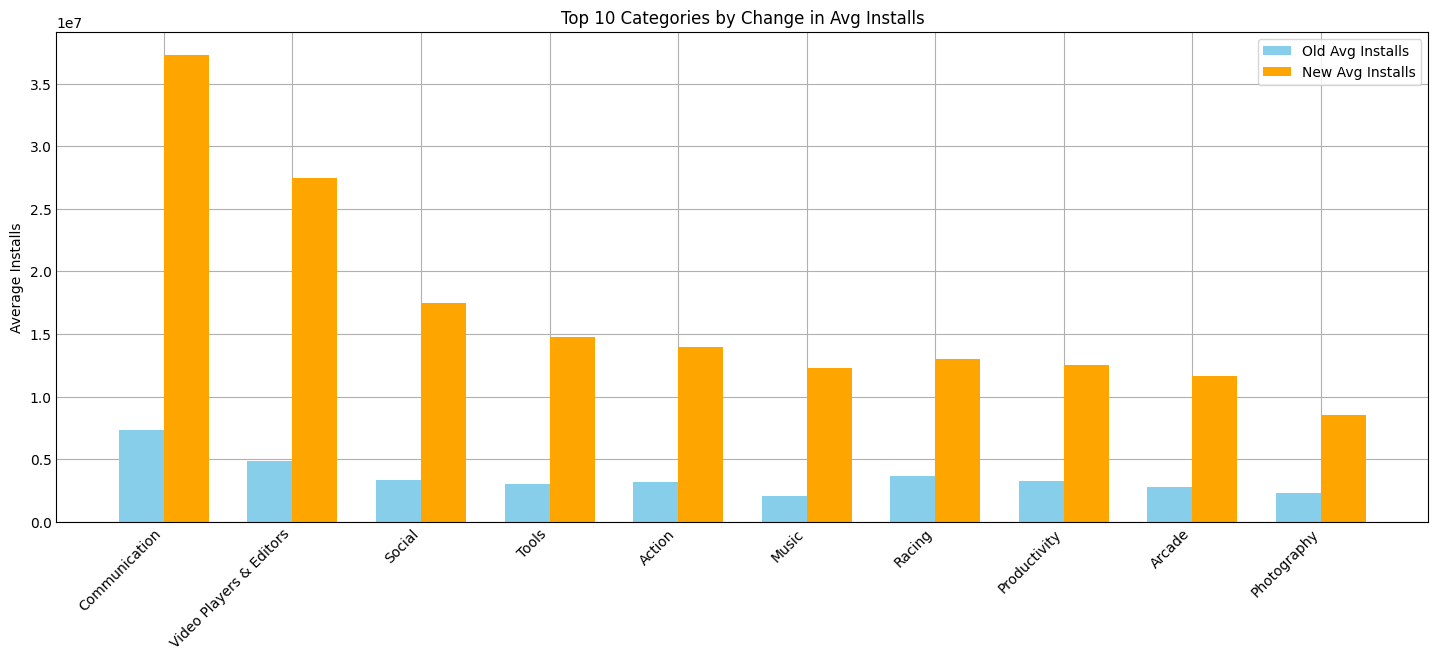

In [27]:
#Bar graph
# top_n = 10
# top_installs = df_compare.dropna().sort_values('Avg Installs Change', ascending=False).head(top_n)

# categories = top_installs.index
# old_vals = top_installs['Old Avg Installs']
# new_vals = top_installs['New Avg Installs']

# x = np.arange(len(categories))
# width = 0.35

# fig, ax = plt.subplots(figsize=(14, 5))

# bars1 = ax.bar(x - width/2, old_vals, width, label='Old Avg Installs', color='skyblue')
# bars2 = ax.bar(x + width/2, new_vals, width, label='New Avg Installs', color='orange')

# ax.set_ylabel('Average Installs')
# ax.set_title(f'Top {top_n} Categories by Change in Avg Installs')
# ax.set_xticks(x)
# ax.set_xticklabels(categories, rotation=45, ha='right')
# ax.legend()

# plt.show()


In [ ]:
#Bar graph
# top_n = 10
# top_ratings = df_compare.dropna().sort_values('Avg Rating Change', ascending=False).head(top_n)

# categories = top_ratings.index
# old_vals = top_ratings['Old Avg Rating']
# new_vals = top_ratings['New Avg Rating']

# x = np.arange(len(categories))
# width = 0.35

# fig, ax = plt.subplots(figsize=(14, 5))

# bars1 = ax.bar(x - width/2, old_vals, width, label='Old Avg Rating', color='skyblue')
# bars2 = ax.bar(x + width/2, new_vals, width, label='New Avg Rating', color='orange')

# ax.set_ylabel('Average Rating')
# ax.set_title(f'Top {top_n} Categories by Change in Avg Rating')
# ax.set_xticks(x)
# ax.set_xticklabels(categories, rotation=45, ha='right')
# ax.legend()

# all_vals = np.concatenate([old_vals, new_vals])
# y_min = max(0, all_vals.min() - 0.1)
# y_max = min(5, all_vals.max() + 0.1)
# ax.set_ylim(y_min, y_max)

# plt.show()


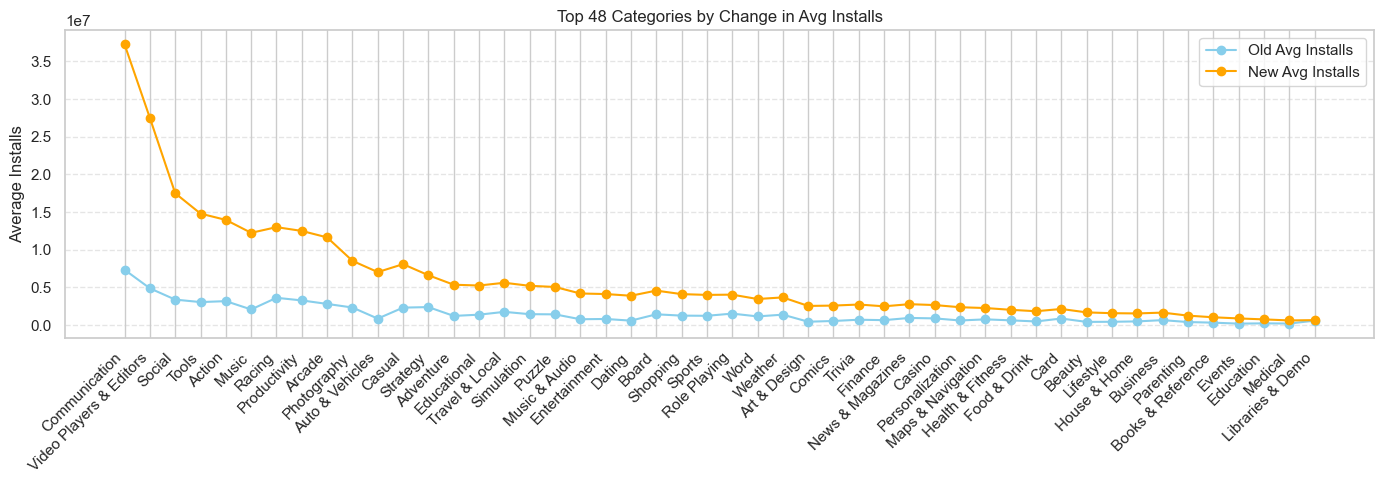

In [36]:
top_n = 48
top_installs = df_compare.dropna().sort_values('Avg Installs Change', ascending=False).head(top_n)

categories = top_installs.index
old_vals = top_installs['Old Avg Installs']
new_vals = top_installs['New Avg Installs']

x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(x, old_vals, marker='o', linestyle='-', color='skyblue', label='Old Avg Installs')
ax.plot(x, new_vals, marker='o', linestyle='-', color='orange', label='New Avg Installs')

ax.set_ylabel('Average Installs')
ax.set_title(f'Top {top_n} Categories by Change in Avg Installs')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


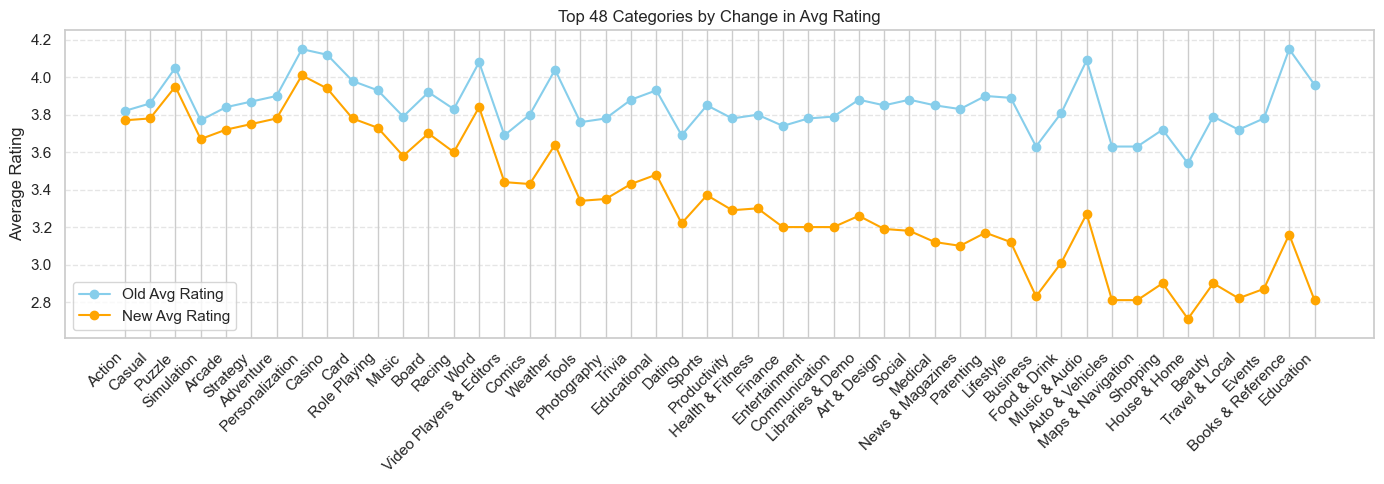

In [38]:
top_n = 48
top_ratings = df_compare.dropna().sort_values('Avg Rating Change', ascending=False).head(top_n)

categories = top_ratings.index
old_vals = top_ratings['Old Avg Rating']
new_vals = top_ratings['New Avg Rating']

x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(x, old_vals, marker='o', linestyle='-', color='skyblue', label='Old Avg Rating')
ax.plot(x, new_vals, marker='o', linestyle='-', color='orange', label='New Avg Rating')

ax.set_ylabel('Average Rating')
ax.set_title(f'Top {top_n} Categories by Change in Avg Rating')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

all_vals = np.concatenate([old_vals, new_vals])
y_min = max(0, all_vals.min() - 0.1)
y_max = min(5, all_vals.max() + 0.1)
ax.set_ylim(y_min, y_max)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [30]:
old_store['Maximum Installs'] = pd.to_numeric(old_store['Maximum Installs'], errors='coerce')

filtered_old = old_store[(old_store['Rating'].notna()) & (old_store['Rating'] != 0.0)]
filtered_old = filtered_old[filtered_old['Rating'] < 5.0]

is_paid_old = ~filtered_old['Free']
has_ads_old = filtered_old['Ad Supported'] == True
has_iap_old = filtered_old['In App Purchases'] == True
fully_free_old = filtered_old['Free'] & ~has_ads_old & ~has_iap_old
with_ads_old = filtered_old['Free'] & has_ads_old & ~has_iap_old
with_iap_old = filtered_old['Free'] & ~has_ads_old & has_iap_old
with_both_old = filtered_old['Free'] & has_ads_old & has_iap_old

pricing_groups_old = {
    'Fully Free': filtered_old[fully_free_old],
    'With Ads': filtered_old[with_ads_old],
    'Paid': filtered_old[is_paid_old],
    'With IAP': filtered_old[with_iap_old],
    'With Ads + IAP': filtered_old[with_both_old]
}

bias_multiplier = 2.5
min_apps_required = 5

top_avg_all_avg_pricing_old = {}

for pricing_method, df in pricing_groups_old.items():
    if len(df) < min_apps_required:
        continue

    df_sorted = df.sort_values('Maximum Installs', ascending=False)
    avg_all_installs = df_sorted['Maximum Installs'].mean()

    standout_apps = df_sorted[df_sorted['Maximum Installs'] > bias_multiplier * avg_all_installs]
    if standout_apps.empty:
        continue

    remaining_apps = df_sorted[~df_sorted['App Id'].isin(standout_apps['App Id'])]
    if remaining_apps.empty:
        continue

    standout_ratings = standout_apps['Rating'].dropna()
    remaining_ratings = remaining_apps['Rating'].dropna()
    avg_top_rating = round(standout_ratings.mean(), 2) if not standout_ratings.empty else "n/a"
    avg_remaining_rating = round(remaining_ratings.mean(), 2) if not remaining_ratings.empty else "n/a"

    standout_installs = standout_apps['Maximum Installs']
    remaining_installs = remaining_apps['Maximum Installs']
    avg_top_installs = round(standout_installs.mean())
    avg_remaining_installs = round(remaining_installs.mean())
    total_top_installs = standout_installs.sum()
    total_remaining_installs = remaining_installs.sum()

    total_apps = len(standout_apps) + len(remaining_apps)
    Remaining_ratio = round(len(remaining_apps) / total_apps * 100, 1)
    bias_ratio = avg_top_installs / avg_remaining_installs if avg_remaining_installs > 0 else 0

    top_avg_all_avg_pricing_old[pricing_method] = [
        bias_ratio, Remaining_ratio, len(standout_apps), len(remaining_apps),
        avg_top_rating, avg_remaining_rating, total_top_installs, total_remaining_installs
    ]

df_new_pricing = pd.DataFrame.from_dict(top_avg_all_avg_pricing, orient='index',
    columns=['Bias Ratio New', 'Remaining % New', 'Standout Count New', 'Remaining Count New',
             'Avg Top Rating New', 'Avg Remaining Rating New', 'Total Top Installs New', 'Total Remaining Installs New'])

df_old_pricing = pd.DataFrame.from_dict(top_avg_all_avg_pricing_old, orient='index',
    columns=['Bias Ratio Old', 'Remaining % Old', 'Standout Count Old', 'Remaining Count Old',
             'Avg Top Rating Old', 'Avg Remaining Rating Old', 'Total Top Installs Old', 'Total Remaining Installs Old'])

df_pricing_compare = df_old_pricing.join(df_new_pricing, how='outer').fillna(0)

df_pricing_compare['Bias Ratio Change'] = df_pricing_compare['Bias Ratio New'] - df_pricing_compare['Bias Ratio Old']
df_pricing_compare['Avg Top Rating Change'] = df_pricing_compare['Avg Top Rating New'] - df_pricing_compare['Avg Top Rating Old']
df_pricing_compare['Avg Remaining Rating Change'] = df_pricing_compare['Avg Remaining Rating New'] - df_pricing_compare['Avg Remaining Rating Old']
df_pricing_compare['Standout Count Change'] = df_pricing_compare['Standout Count New'] - df_pricing_compare['Standout Count Old']

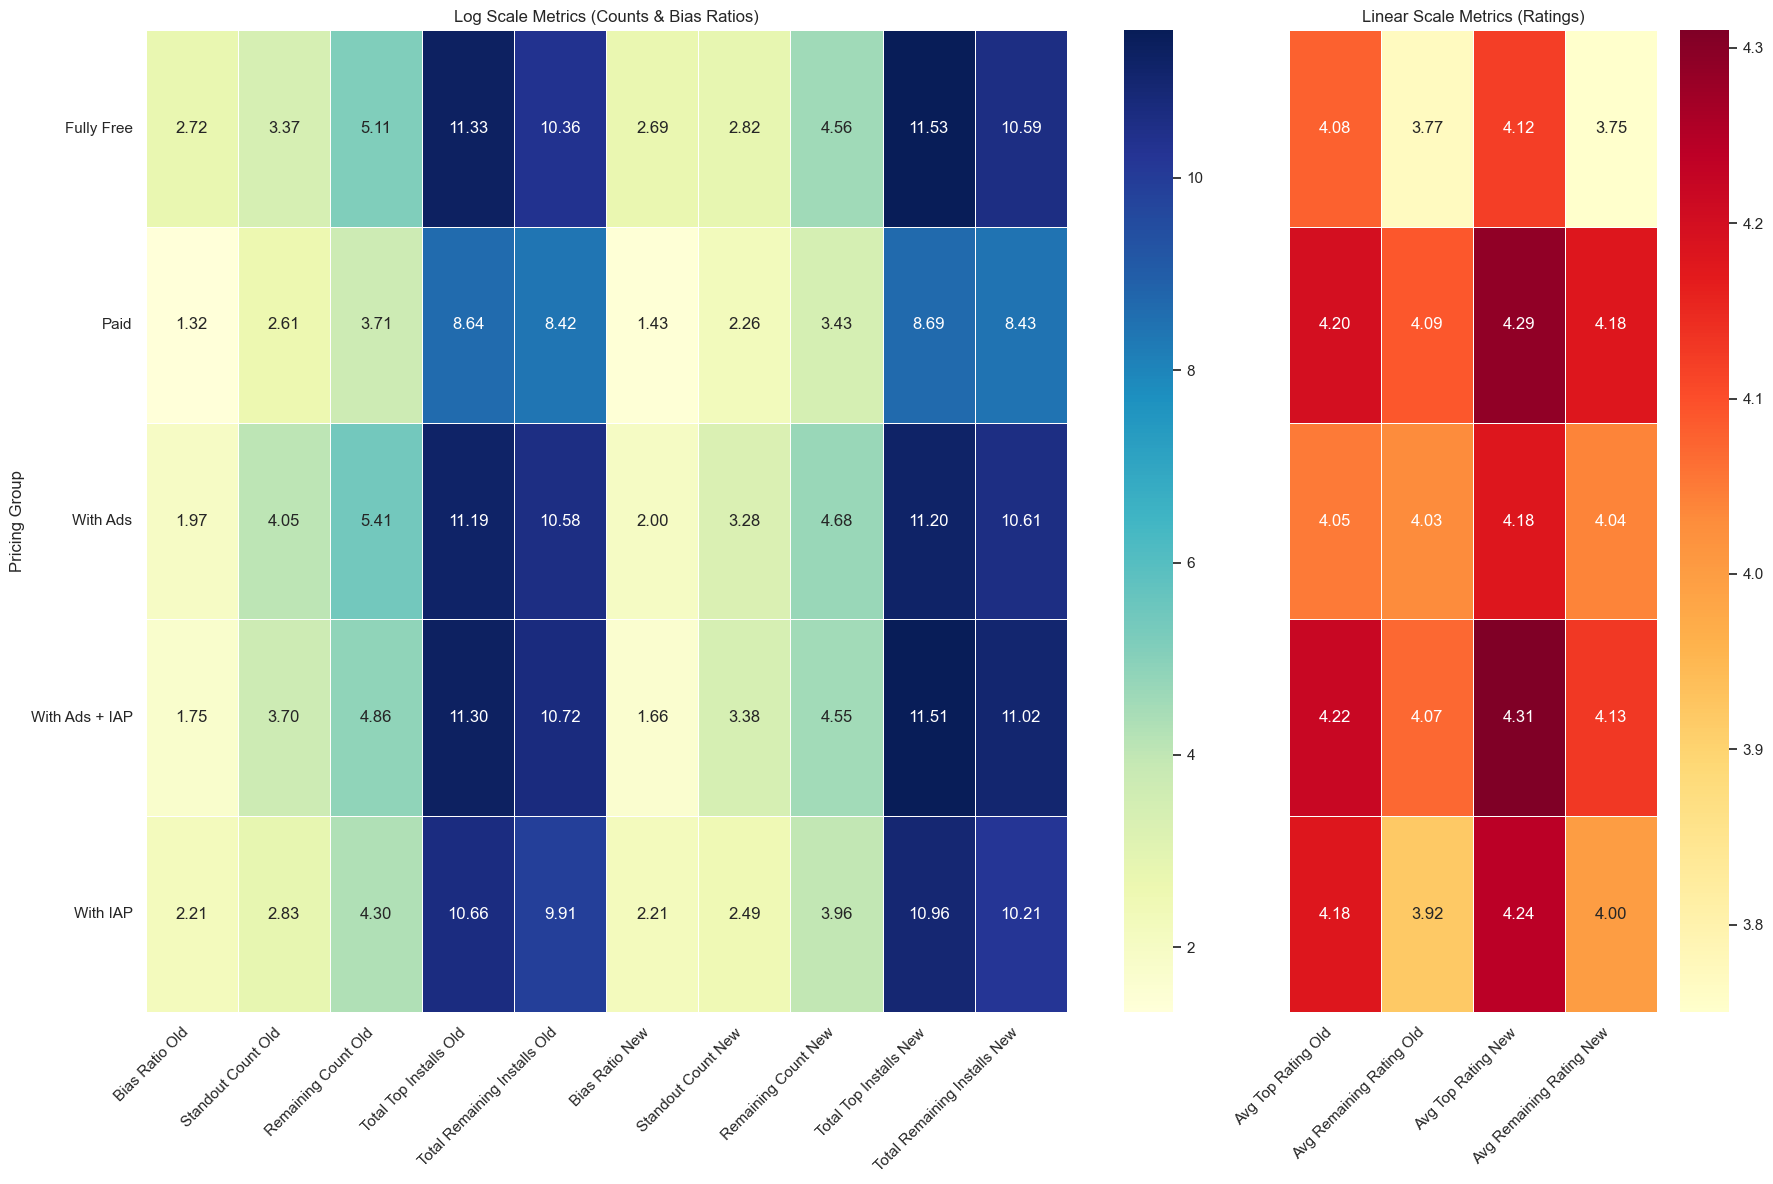

In [31]:
sns.set(style='whitegrid')

columns = [
    "Bias Ratio Old", "Standout Count Old", "Remaining Count Old",
    "Avg Top Rating Old", "Avg Remaining Rating Old",
    "Total Top Installs Old", "Total Remaining Installs Old",
    "Bias Ratio New", "Standout Count New", "Remaining Count New",
    "Avg Top Rating New", "Avg Remaining Rating New",
    "Total Top Installs New", "Total Remaining Installs New"
]

df_heat = df_pricing_compare[columns]

log_columns = [
    "Bias Ratio Old", "Standout Count Old", "Remaining Count Old",
    "Total Top Installs Old", "Total Remaining Installs Old",
    "Bias Ratio New", "Standout Count New", "Remaining Count New",
    "Total Top Installs New", "Total Remaining Installs New"
]
linear_columns = [
    "Avg Top Rating Old", "Avg Remaining Rating Old",
    "Avg Top Rating New", "Avg Remaining Rating New"
]

df_log = df_heat[log_columns]
df_log = np.log10(df_log + 1e-3)

df_linear = df_heat[linear_columns]

fig, axes = plt.subplots(1, 2, figsize=(18, 12), gridspec_kw={'width_ratios': [len(log_columns), len(linear_columns)]})

sns.heatmap(df_log, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, ax=axes[0], cbar=True)
axes[0].set_title("Log Scale Metrics (Counts & Bias Ratios)")
axes[0].set_ylabel("Pricing Group")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.heatmap(df_linear, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5, ax=axes[1], cbar=True)
axes[1].set_title("Linear Scale Metrics (Ratings)")
axes[1].set_ylabel("")
axes[1].set_yticklabels([]) 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
bias_multiplier = 2.5
min_apps_required = 5

def compute_category_bias(store_df, installs_col, rating_col, app_id_col):
    store_df[installs_col] = pd.to_numeric(store_df[installs_col], errors='coerce')
    filtered = store_df[(store_df[rating_col].notna()) & (store_df[rating_col] < 5.0)]

    categories = filtered['Category'].unique()
    category_bias_stats = {}

    for category in categories:
        cat_apps = filtered[filtered['Category'] == category]
        if len(cat_apps) < min_apps_required:
            continue

        cat_apps_sorted = cat_apps.sort_values(installs_col, ascending=False)
        avg_all_installs = cat_apps_sorted[installs_col].mean()

        standout_apps = cat_apps_sorted[cat_apps_sorted[installs_col] > bias_multiplier * avg_all_installs]
        if standout_apps.empty:
            continue

        remaining_apps = cat_apps_sorted[~cat_apps_sorted[app_id_col].isin(standout_apps[app_id_col])]
        if remaining_apps.empty:
            continue

        standout_ratings = standout_apps[rating_col].dropna()
        remaining_ratings = remaining_apps[rating_col].dropna()

        avg_top_rating = round(standout_ratings.mean(), 2) if not standout_ratings.empty else np.nan
        avg_remaining_rating = round(remaining_ratings.mean(), 2) if not remaining_ratings.empty else np.nan

        standout_installs = standout_apps[installs_col]
        remaining_installs = remaining_apps[installs_col]

        avg_top_installs = round(standout_installs.mean())
        avg_remaining_installs = round(remaining_installs.mean())
        total_top_installs = standout_installs.sum()
        total_remaining_installs = remaining_installs.sum()

        total_apps = len(standout_apps) + len(remaining_apps)
        remaining_ratio = round(len(remaining_apps) / total_apps * 100, 1)
        bias_ratio = avg_top_installs / avg_remaining_installs if avg_remaining_installs > 0 else 0

        category_bias_stats[category] = [
            bias_ratio, remaining_ratio, len(standout_apps), len(remaining_apps),
            avg_top_rating, avg_remaining_rating, total_top_installs, total_remaining_installs
        ]

    return category_bias_stats


old_category_bias = compute_category_bias(
    old_store,
    installs_col='Maximum Installs',
    rating_col='Rating',
    app_id_col='App Id'
)

new_category_bias = compute_category_bias(
    store,
    installs_col='Installs',
    rating_col='Rating',
    app_id_col='App Id'
)

columns = [
    "Bias Ratio", "Avg Ratio (%)", "Standout Apps", "Remaining Apps",
    "Avg Rating (Standout)", "Avg Rating (Remaining)",
    "Total Installs (Standout)", "Total Installs (Remaining)"
]

df_old_cat_bias = pd.DataFrame.from_dict(old_category_bias, orient='index', columns=columns)
df_new_cat_bias = pd.DataFrame.from_dict(new_category_bias, orient='index', columns=columns)

df_cat_bias_compare = df_old_cat_bias.add_suffix(' Old').join(df_new_cat_bias.add_suffix(' New'), how='outer').fillna(0)

df_cat_bias_compare['Bias Ratio Change'] = df_cat_bias_compare['Bias Ratio New'] - df_cat_bias_compare['Bias Ratio Old']
df_cat_bias_compare['Avg Top Rating Change'] = df_cat_bias_compare['Avg Rating (Standout) New'] - df_cat_bias_compare['Avg Rating (Standout) Old']
df_cat_bias_compare['Avg Remaining Rating Change'] = df_cat_bias_compare['Avg Rating (Remaining) New'] - df_cat_bias_compare['Avg Rating (Remaining) Old']
df_cat_bias_compare['Standout Count Change'] = df_cat_bias_compare['Standout Apps New'] - df_cat_bias_compare['Standout Apps Old']

df_cat_bias_compare.sort_values('Bias Ratio Change', ascending=False, inplace=True)



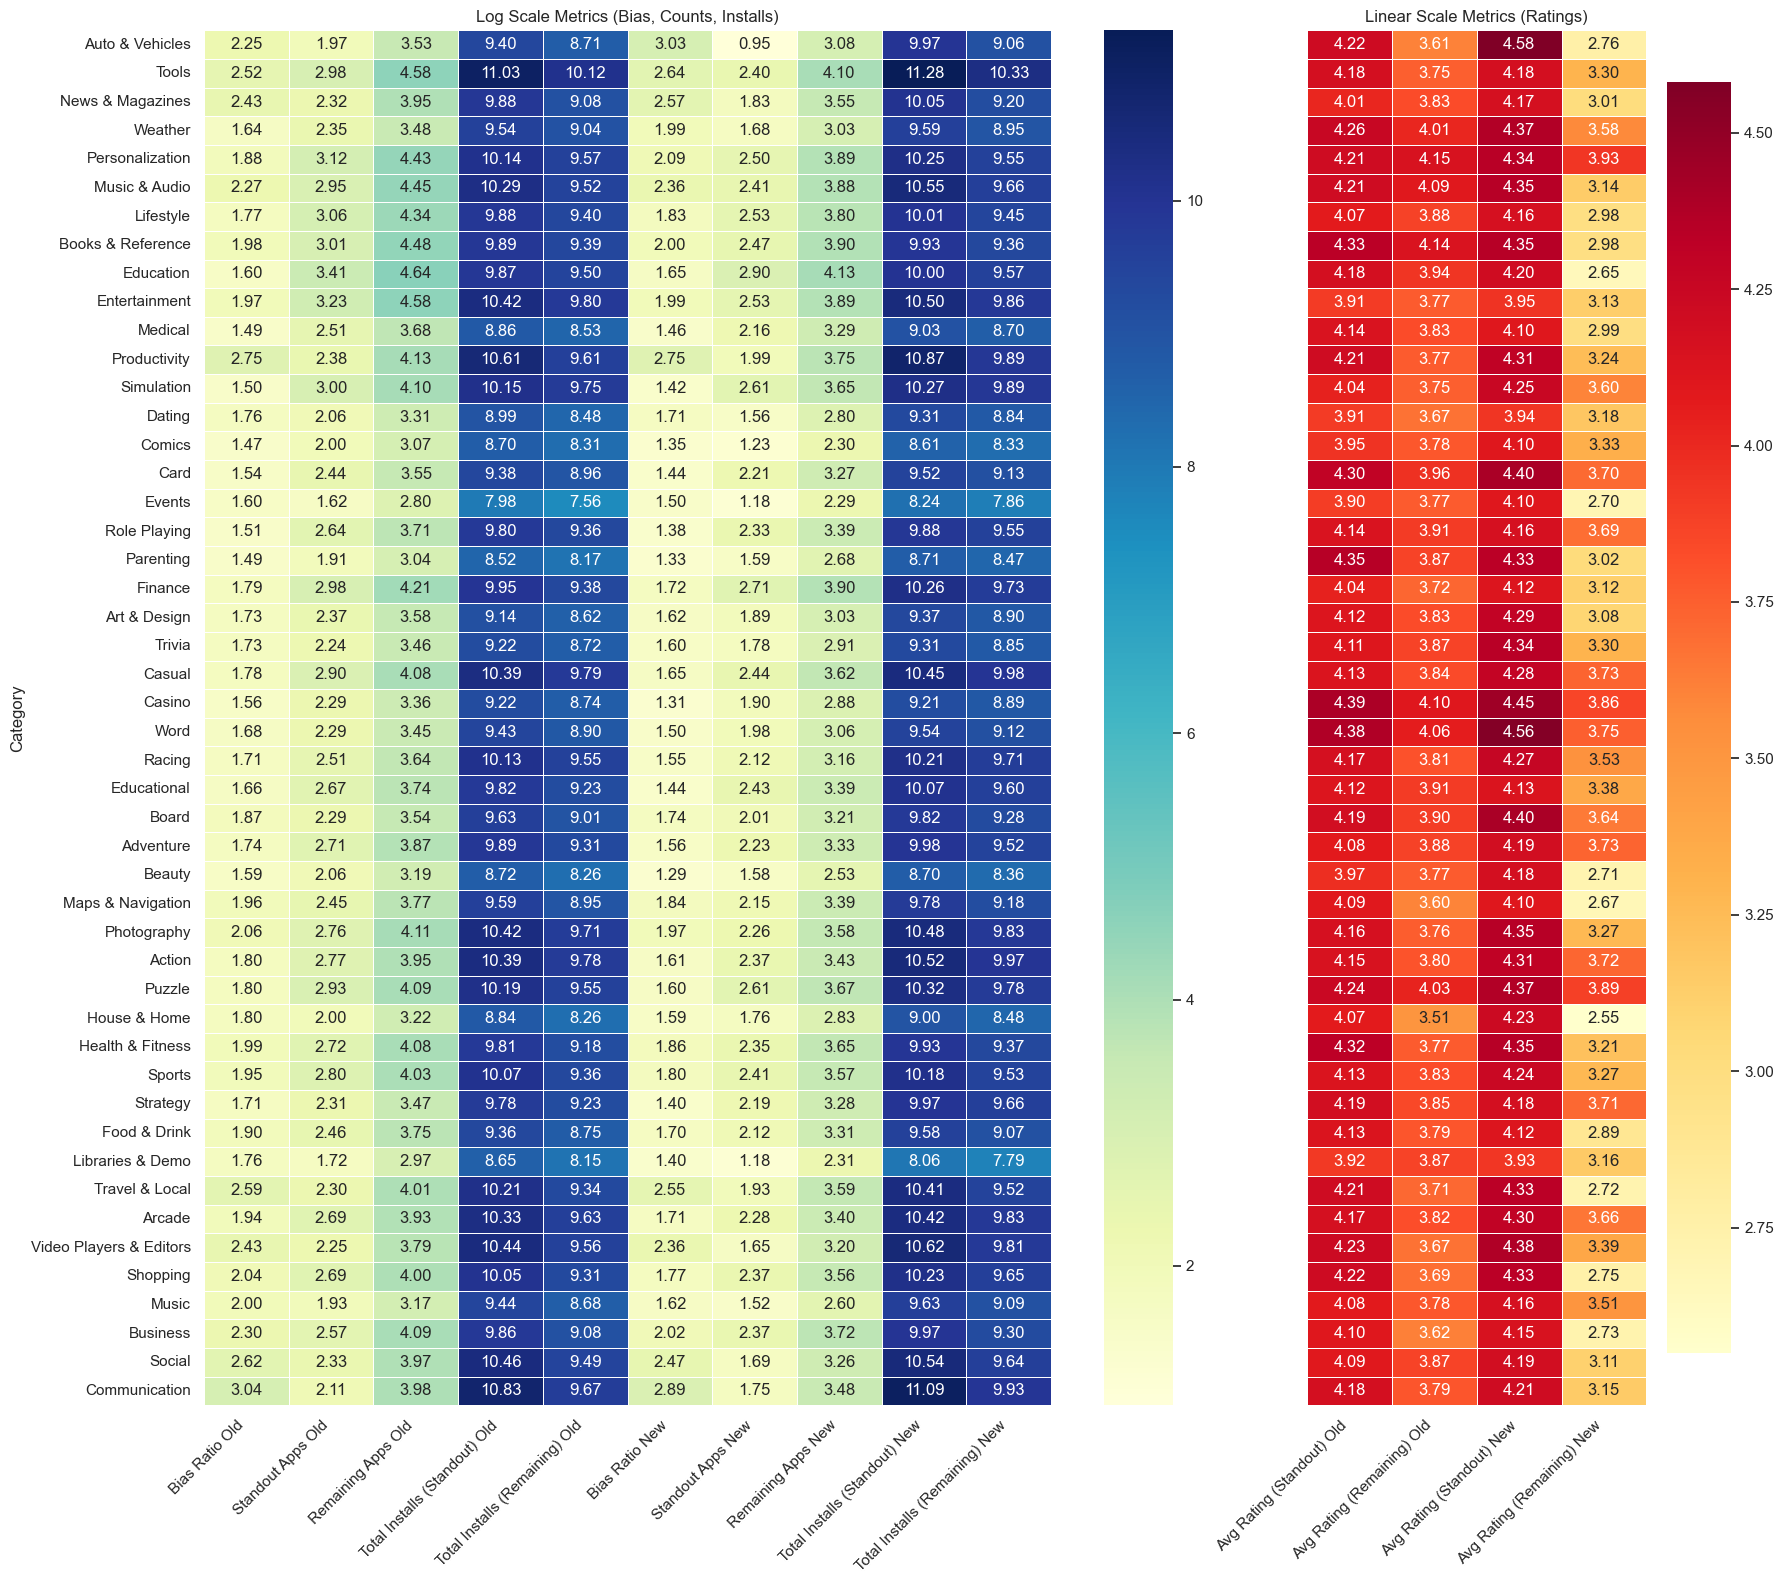

In [ ]:
log_columns = [
    "Bias Ratio Old", "Standout Apps Old", "Remaining Apps Old",
    "Total Installs (Standout) Old", "Total Installs (Remaining) Old",
    "Bias Ratio New", "Standout Apps New", "Remaining Apps New",
    "Total Installs (Standout) New", "Total Installs (Remaining) New"
]

linear_columns = [
    "Avg Rating (Standout) Old", "Avg Rating (Remaining) Old",
    "Avg Rating (Standout) New", "Avg Rating (Remaining) New"
]

df_log = df_cat_bias_compare[log_columns].fillna(0)
df_linear = df_cat_bias_compare[linear_columns].fillna(0)

df_log = np.log10(df_log + 1e-3)

fig, axes = plt.subplots(1, 2, figsize=(18, 16), gridspec_kw={'width_ratios': [len(log_columns)//2, len(linear_columns)//2]})

sns.heatmap(
    df_log,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    ax=axes[0],
    cbar=True
)
axes[0].set_title("Log Scale Metrics (Bias, Counts, Installs)")
axes[0].set_ylabel("Category")
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha='right')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.heatmap(
    df_linear,
    annot=True,
    fmt=".2f",
    cmap="YlOrRd",
    linewidths=0.5,
    ax=axes[1],
    cbar=True
)
axes[1].set_title("Linear Scale Metrics (Ratings)")
axes[1].set_ylabel("")
axes[1].set_yticklabels([])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


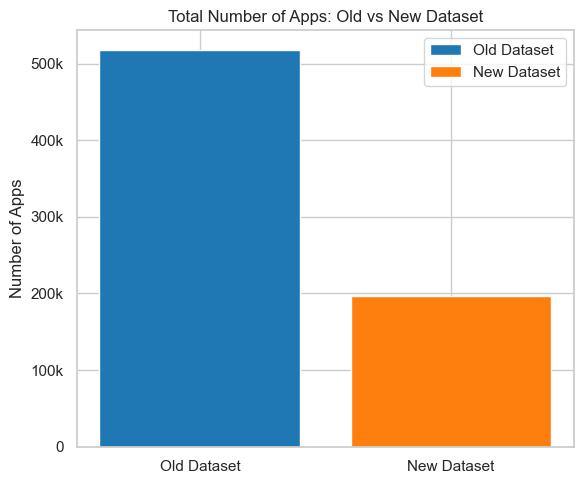

In [ ]:
old_count = len(old_store)
new_count = len(store)

data_sizes = {
    'Old Dataset': old_count,
    'New Dataset': new_count
}

def thousands_formatter(x, pos):
    return f'{int(x/1000)}k' if x >= 1000 else str(int(x))

plt.figure(figsize=(6, 5))
bars = plt.bar(data_sizes.keys(), data_sizes.values(), color=['#1f77b4', '#ff7f0e'])

plt.title('Total Number of Apps: Old vs New Dataset')
plt.ylabel('Number of Apps')

plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.legend(bars, data_sizes.keys())

plt.tight_layout()
plt.show()


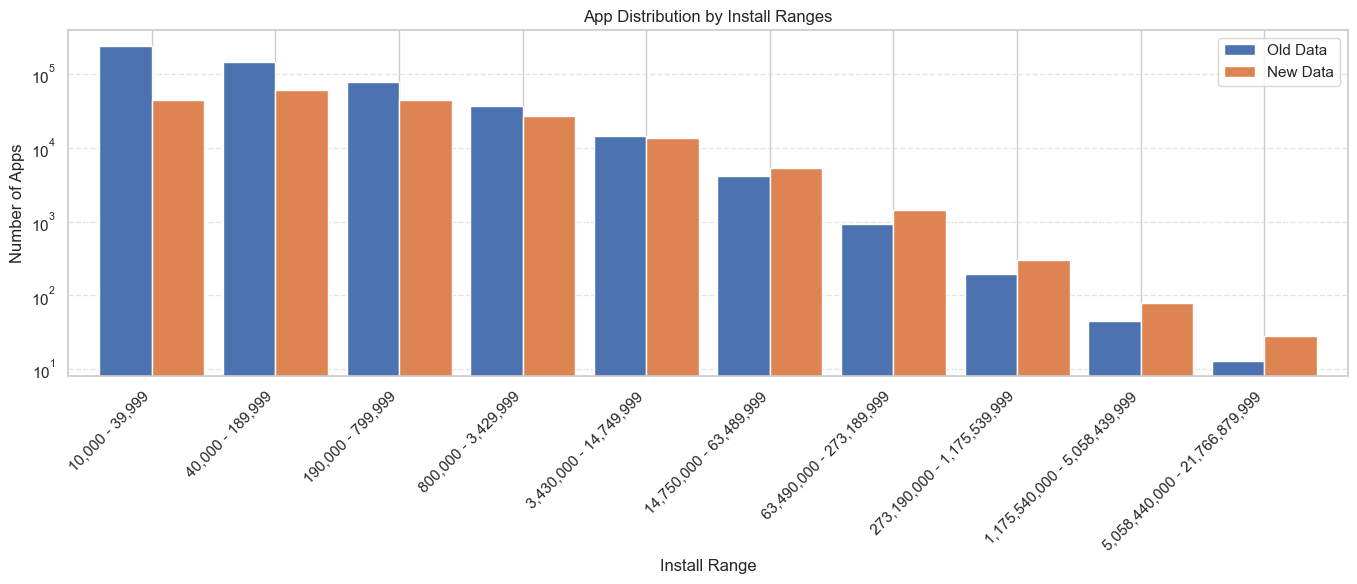

In [35]:
old_store['Maximum Installs'] = pd.to_numeric(old_store['Maximum Installs'], errors='coerce')
store['Installs'] = pd.to_numeric(store['Installs'], errors='coerce')

combined_installs = pd.concat([old_store['Maximum Installs'], store['Installs']])

min_installs = int(np.floor(combined_installs.min()))
max_installs = int(np.ceil(combined_installs.max()))

log_bins = np.logspace(np.log10(min_installs), np.log10(max_installs), num=11)

def round_to_base(x, base=10000):
    return int(base * round(x / base))

rounded_edges = [round_to_base(x) for x in log_bins]

rounded_edges = sorted(set(rounded_edges))

labels = []
for i in range(len(rounded_edges) - 1):
    start = rounded_edges[i]
    end = rounded_edges[i+1] - 1
    labels.append(f"{start:,} - {end:,}")

old_bins = pd.cut(old_store['Maximum Installs'], bins=log_bins, labels=labels, include_lowest=True)
new_bins = pd.cut(store['Installs'], bins=log_bins, labels=labels, include_lowest=True)

old_counts = old_bins.value_counts().sort_index()
new_counts = new_bins.value_counts().sort_index()

df_bins = pd.DataFrame({
    "Old Data": old_counts,
    "New Data": new_counts
})

df_bins.plot(kind='bar', figsize=(14, 6), width=0.85)
plt.title("App Distribution by Install Ranges")
plt.xlabel("Install Range")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.yscale('log')
plt.show()
